In [1]:
import json
import math
import pandas as pd
from collections import defaultdict
def tree(): return defaultdict(tree)

In [2]:
data = ''
with open('8.json', 'r') as file:
    for line in file:
        data += line
data = json.loads(data)
rounds = data['ROUNDS']

In [3]:
def get_name(bot, r):
    return rounds[r][bot]['NAME']

def get_method(bot, r):
    return rounds[r][bot]['USED']

def get_points(bot, r):
    return rounds[r][bot]['POINTS']

def get_time(bot, r):
    return rounds[r][bot]['TIME']

def get_round_num(r):
    return rounds[r]['ROUND'].split('/')[0]

def get_winner(r):
    return rounds[r]['WINNER']

def get_adv(r):
    return rounds[r]['ADVANTAGE']

In [4]:
methods = {'NOP()': 0, 'PATCH()': 3, 'SCAN()': 3, 'OVERLOAD()': 4, 'OVERHEAR()': 1, 'EXPLOIT()': 2, 'INFECT()': 4}
bot = tree()
general = tree()
name1, name2 = get_name('BOT_1', 0), get_name('BOT_2', 0)
bot['USED'][name1] = []
bot['USED'][name2] = []
bot['POINTS'][name1] = []
bot['POINTS'][name2] = []
general['RESULT'] = []
general['ADVANTAGE'] = []
for m in methods.keys():
    bot['WON_WITH'][name1][m] = 0
    bot['WON_WITH'][name2][m] = 0
    bot['EARN_BY'][name1][m] = 0
    bot['EARN_BY'][name2][m] = 0
    bot['LOST_WITH'][name1][m] = 0
    bot['LOST_WITH'][name2][m] = 0
    
for i in range(len(rounds)):
    bot['USED'][name1].append(get_method('BOT_1', i))
    bot['USED'][name2].append(get_method('BOT_2', i))
    bot['POINTS'][name1].append(get_points('BOT_1', i))
    bot['POINTS'][name2].append(get_points('BOT_2', i))
    general['RESULT'].append(get_winner(i))
    general['ADVANTAGE'].append(get_adv(i))
    
    if get_winner(i) == name1:
        bot['WON_WITH'][name1][get_method('BOT_1', i)] += 1
        bot['EARN_BY'][name1][get_method('BOT_1', i)] += methods[get_method('BOT_1', i)]
        bot['LOST_WITH'][name2][get_method('BOT_2', i)] += 1
    elif get_winner(i) == name2:
        bot['WON_WITH'][name2][get_method('BOT_2', i)] += 1
        bot['EARN_BY'][name2][get_method('BOT_2', i)] += methods[get_method('BOT_2', i)]
        bot['LOST_WITH'][name1][get_method('BOT_1', i)] += 1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203ECFD5948>],
      dtype=object)

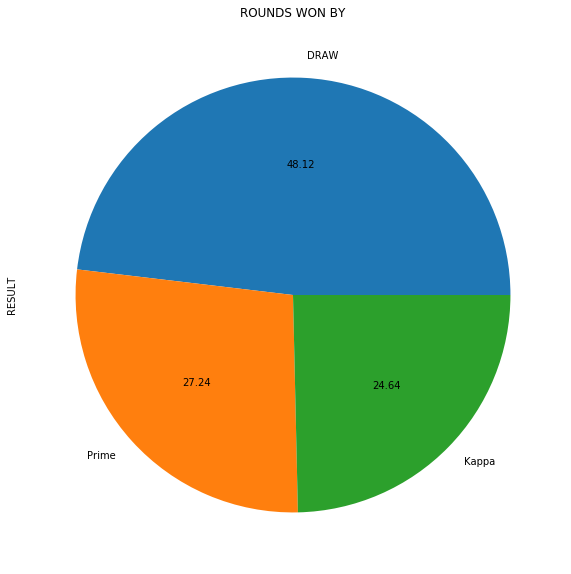

In [5]:
dfwinner = pd.read_json(json.dumps(general))
dfwinner['RESULT'].value_counts().plot.pie(subplots=True, figsize=(10, 10), autopct='%.2f', title=["ROUNDS WON BY"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203EDA14948>],
      dtype=object)

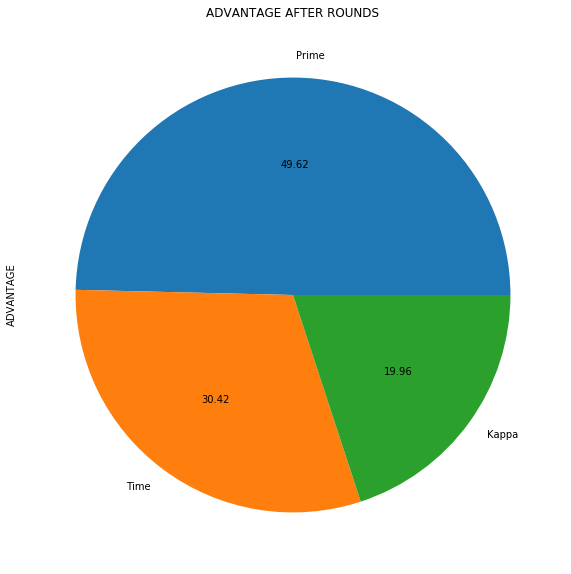

In [6]:
dfwinner['ADVANTAGE'].value_counts().plot.pie(subplots=True, figsize=(10, 10), autopct='%.2f', title=["ADVANTAGE AFTER ROUNDS"])

In [7]:
df = pd.read_json(json.dumps(bot))

In [8]:
df['POINTS'][name1] = pd.Series(df['POINTS'][name1])
df['POINTS'][name2] = pd.Series(df['POINTS'][name2])

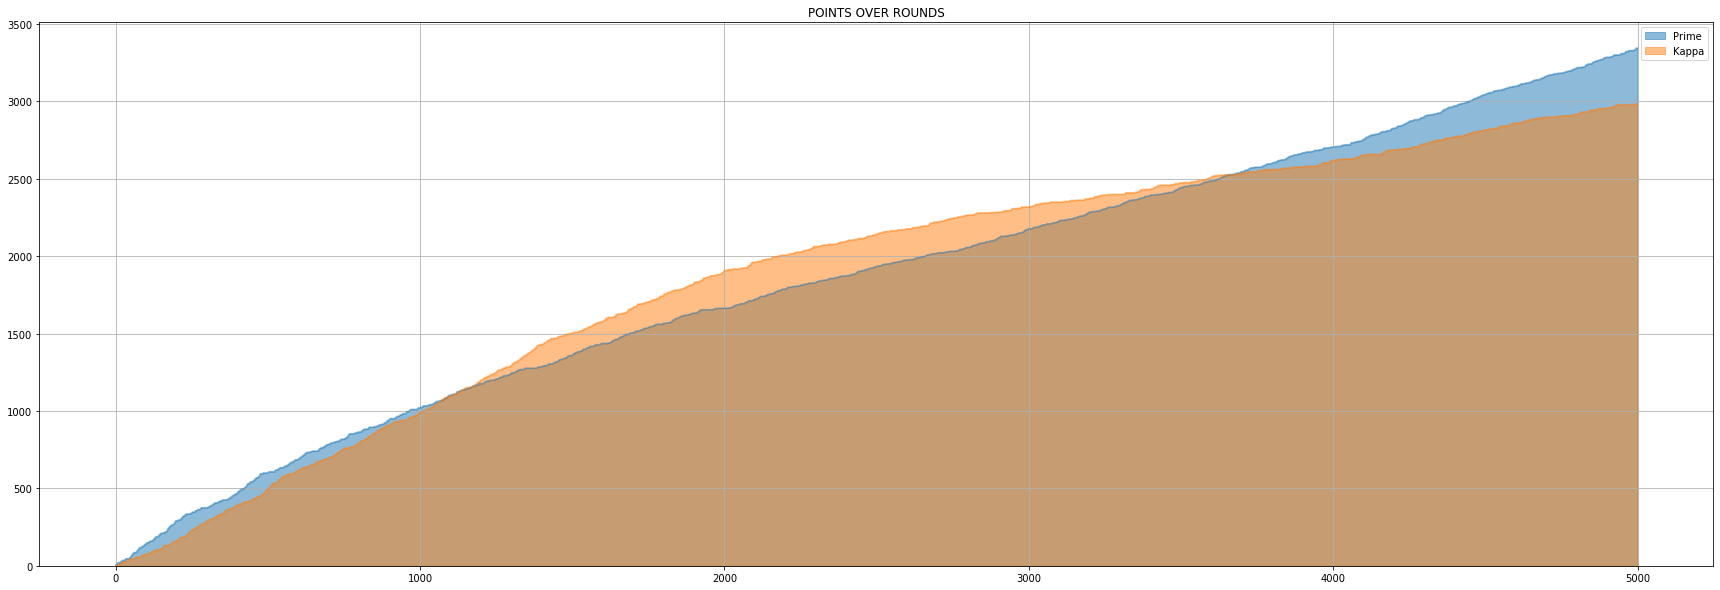

In [9]:
df_p = pd.DataFrame({name1: df['POINTS'][name1],
                    name2: df['POINTS'][name2]})
df_p.plot.area(figsize=(30, 10), grid=True, stacked=False, title="POINTS OVER ROUNDS")

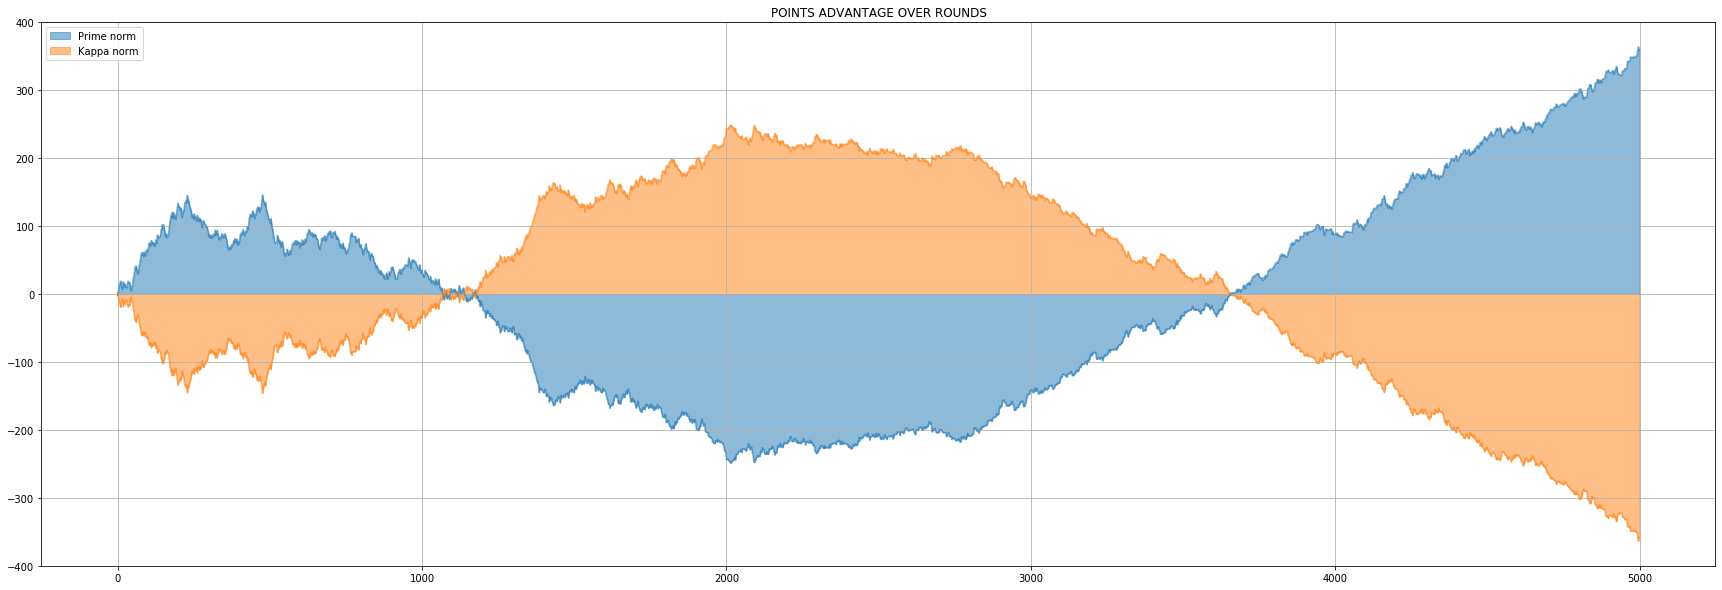

In [10]:
df_p[f'{name1} norm'] = df_p[name1] - df_p[name2]
df_p[f'{name2} norm'] = df_p[name2] - df_p[name1]
df_p.drop(name1, axis=1, inplace=True)
df_p.drop(name2, axis=1, inplace=True)
df_p.plot.area(figsize=(30, 10), grid=True, stacked=False, title="POINTS ADVANTAGE OVER ROUNDS")

In [11]:
df['EARN_BY'][name1] = pd.Series(df['EARN_BY'][name1])
df['EARN_BY'][name2] = pd.Series(df['EARN_BY'][name2])
df['USED'][name1] = pd.Series(df['USED'][name1])
df['USED'][name2] = pd.Series(df['USED'][name2])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203EDB6A488>],
      dtype=object)

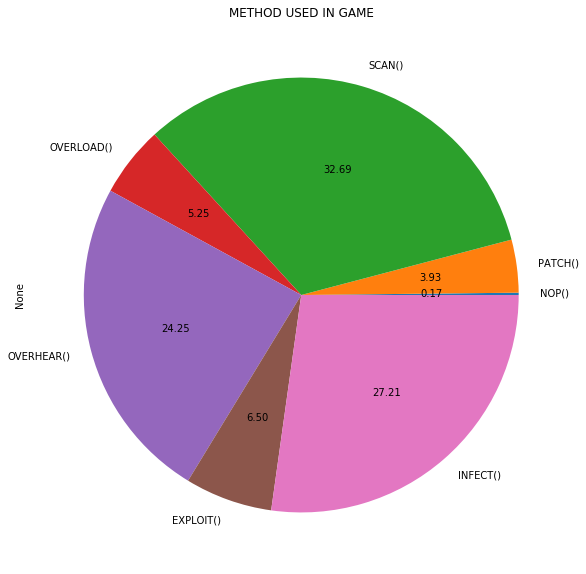

In [12]:
methods = {'NOP()': 0, 'PATCH()': 0, 'SCAN()': 0, 'OVERLOAD()': 0, 'OVERHEAR()': 0, 'EXPLOIT()': 0, 'INFECT()': 0}
for b in df['USED']:
    for m in b:
        methods[m] += 1
        
pd.Series(methods).plot.pie(subplots=True, figsize=(10, 10), autopct='%.2f', title=["METHOD USED IN GAME"])

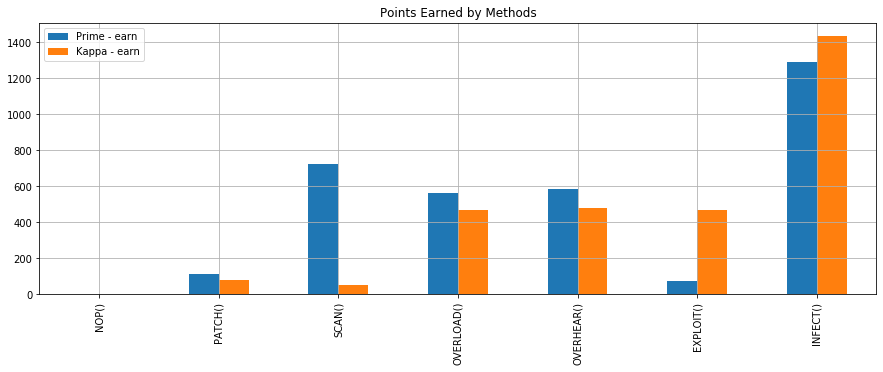

In [13]:
dfe = pd.DataFrame({
    #f'{name1} - used': df['USED'][name1].value_counts(),
    f'{name1} - earn': df['EARN_BY'][name1],
    #f'{name2} - used': df['USED'][name2].value_counts(),
    f'{name2} - earn': df['EARN_BY'][name2],
})
dfe.plot.bar(figsize=(15, 5), grid=True, title="Points Earned by Methods")

In [14]:
df['USED'][name1] = pd.Series(df['USED'][name1])
df['USED'][name2] = pd.Series(df['USED'][name2])

In [15]:
dfu = pd.DataFrame({name1: df['USED'][name1].value_counts(),
                   name2: df['USED'][name2].value_counts()})

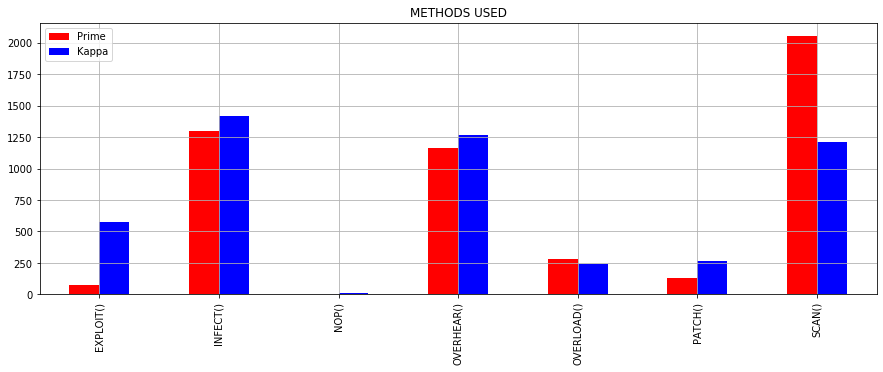

In [16]:
dfu.plot.bar(figsize=(15, 5), grid=True, title="METHODS USED", color=['r', 'b'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203EF6A6B88>,
      dtype=object)

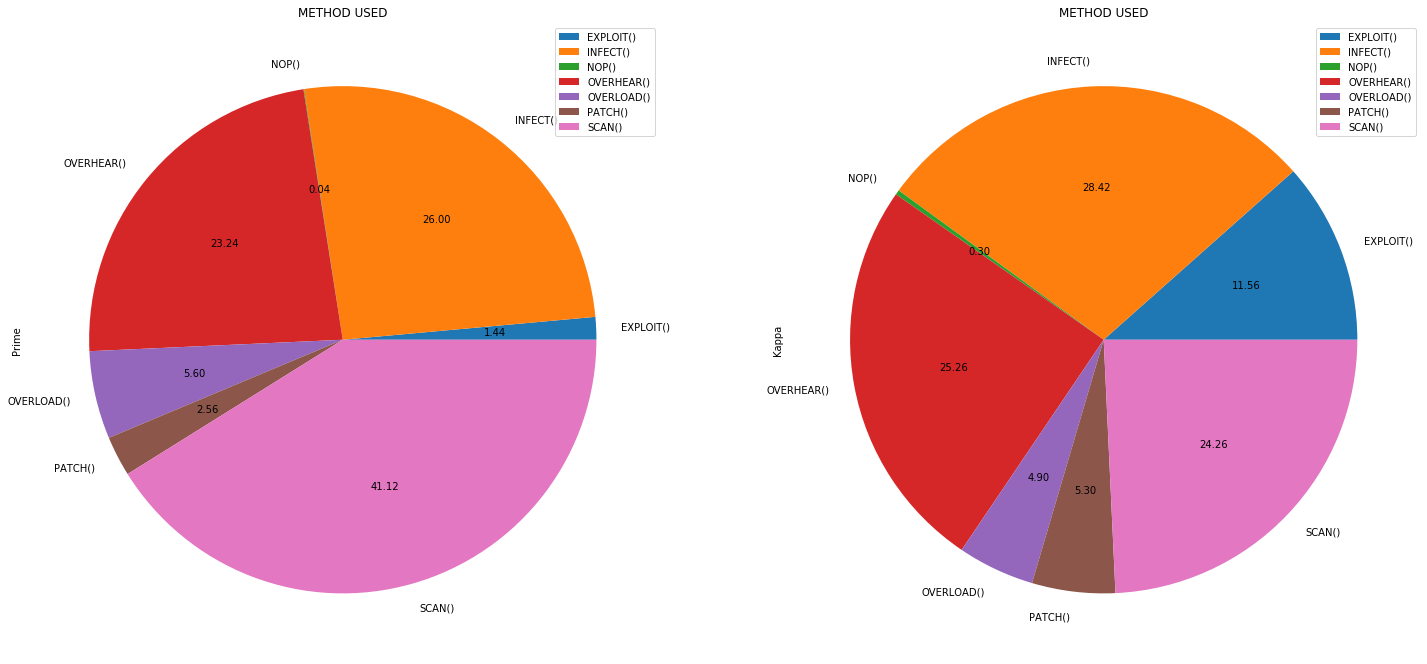

In [17]:
dfu.plot.pie(subplots=True, figsize=(25, 25), autopct='%.2f', title=["METHOD USED", "METHOD USED"])

In [18]:
df_win = pd.read_json(json.dumps(bot['WON_WITH']))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203EF5FEB08>,
      dtype=object)

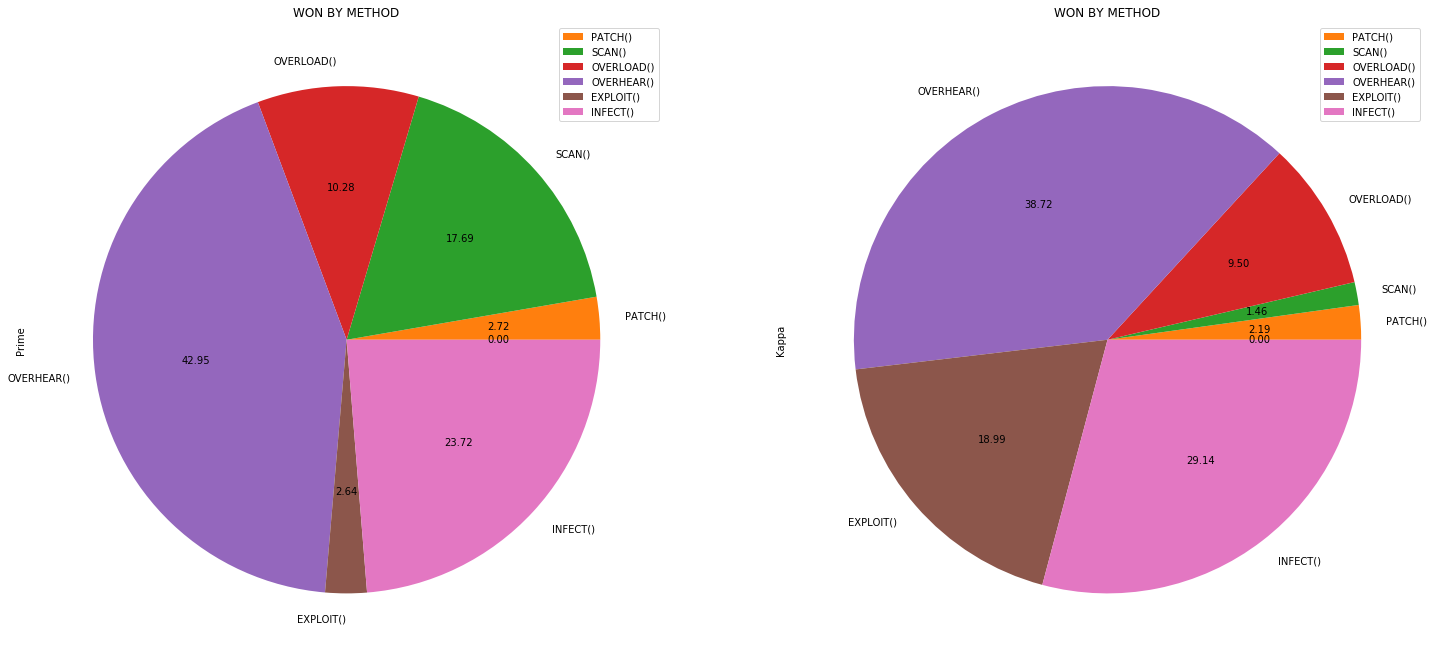

In [19]:
df_win.plot.pie(subplots=True, figsize=(25, 25), autopct='%.2f', title=["WON BY METHOD", "WON BY METHOD"])

In [20]:
df_lost = pd.read_json(json.dumps(bot['LOST_WITH']))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203EFB82648>,
      dtype=object)

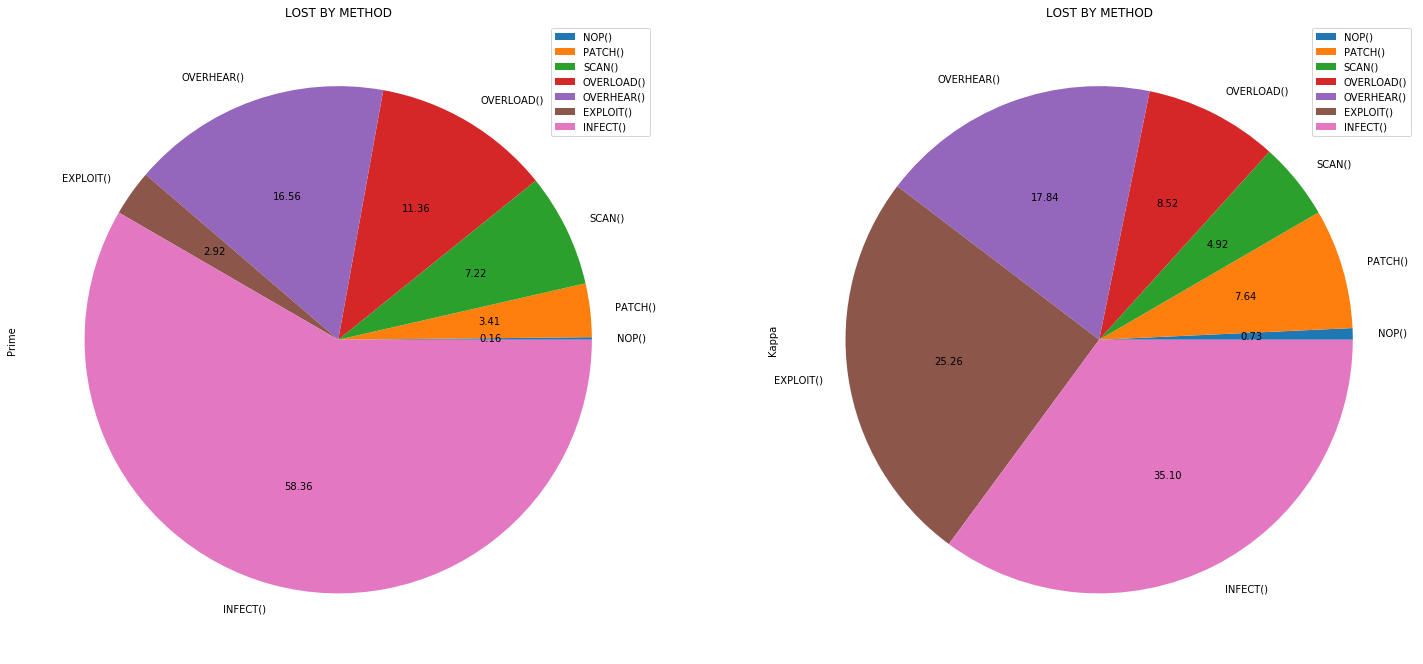

In [21]:
df_lost.plot.pie(subplots=True, figsize=(25, 25), autopct='%.2f', title=["LOST BY METHOD", "LOST BY METHOD"])

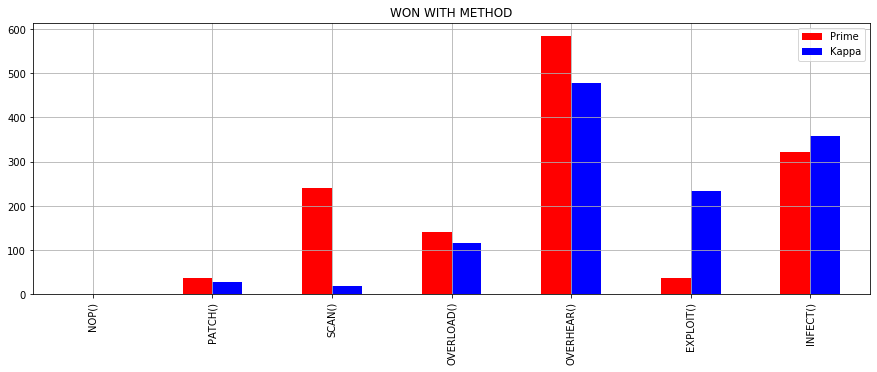

In [22]:
df_win.plot.bar(figsize=(15, 5), grid=True, title="WON WITH METHOD", color=['r', 'b'])

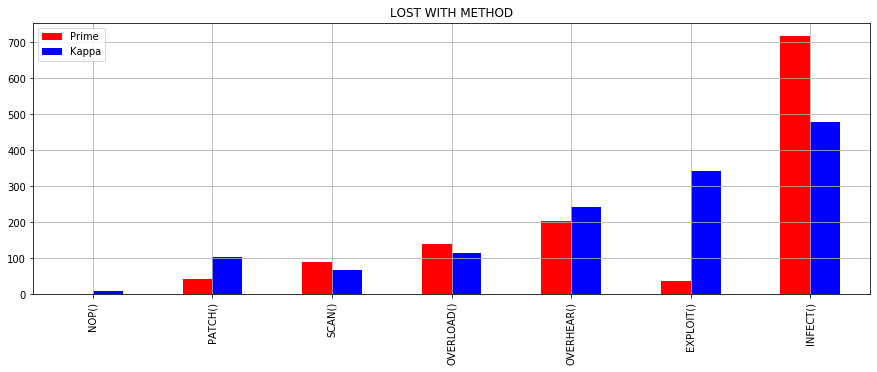

In [23]:
df_lost.plot.bar(figsize=(15, 5), grid=True, title='LOST WITH METHOD', color=['r', 'b'])

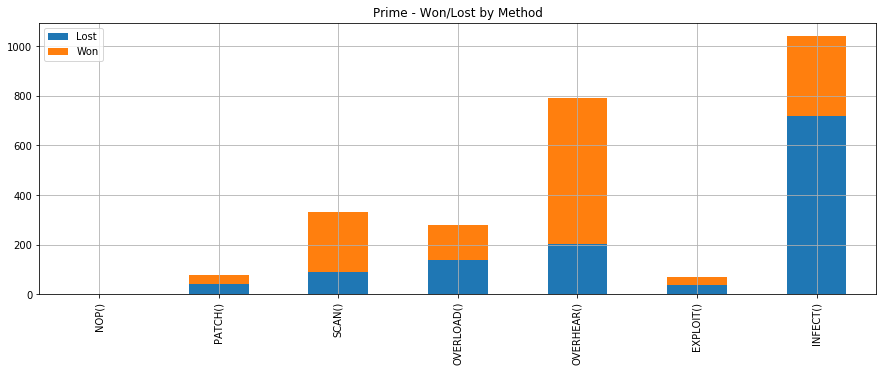

In [24]:
win = df_win[name1].to_dict()
lost = df_lost[name1].to_dict()

df1 = pd.DataFrame({'Lost': lost, 'Won': win})
df1.plot.bar(stacked=True, grid=True, figsize=(15, 5), title=f'{name1} - Won/Lost by Method')

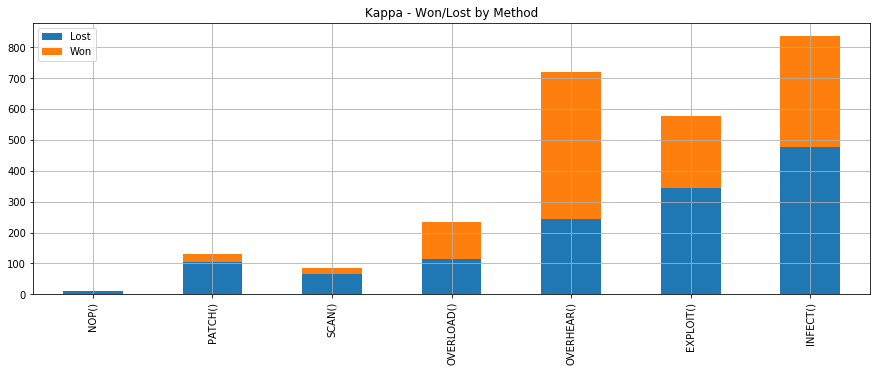

In [25]:
win = df_win[name2].to_dict()
lost = df_lost[name2].to_dict()

df1 = pd.DataFrame({'Lost': lost, 'Won': win})
df1.plot.bar(stacked=True, grid=True, figsize=(15, 5), title=f'{name2} - Won/Lost by Method')